# Mục tiêu : Đọc và phân tích thành phần trong dataset

* Fb15k
* Fb15k-237
* WN18
* WN18RR

In [ ]:
!pip install seaborn

In [158]:
import os
import glob
import pandas as pd
import scipy
import scipy.io
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ROOT = os.path.abspath(os.path.join(".", os.pardir))
DS_DIR = os.path.join(ROOT, "datasets")
DATASETS = ["FB15k", "FB15k-237", "WN18", "WN18RR"]

for dataset in DATASETS:
    dataset_dir = os.path.join(DS_DIR, dataset);
    print(dataset_dir)
    for file in os.listdir(dataset_dir):
        if file.endswith(".txt"):
            print("[",dataset, "]: ", file)

D:\Workspace\thesis\datasets\FB15k
[ FB15k ]:  freebase_mtr100_mte100-test.txt
[ FB15k ]:  freebase_mtr100_mte100-train.txt
[ FB15k ]:  freebase_mtr100_mte100-valid.txt
D:\Workspace\thesis\datasets\FB15k-237
[ FB15k-237 ]:  test.txt
[ FB15k-237 ]:  train.txt
[ FB15k-237 ]:  valid.txt
D:\Workspace\thesis\datasets\WN18
[ WN18 ]:  wordnet-mlj12-definitions.txt
[ WN18 ]:  wordnet-mlj12-test.txt
[ WN18 ]:  wordnet-mlj12-train.txt
[ WN18 ]:  wordnet-mlj12-valid.txt
D:\Workspace\thesis\datasets\WN18RR
[ WN18RR ]:  test.txt
[ WN18RR ]:  train.txt
[ WN18RR ]:  valid.txt


In [207]:
# for file in glob.glob(FB15K):
#     print(file)
# print(glob.glob(FB15K))
# print(glob.glob(FB15K_237))
# print(glob.glob(WN18))
# print(glob.glob(WN18RR))

def read_all_data(dataset):
    dataset_dir = os.path.join(DS_DIR, dataset)
    test_file = glob.glob(os.path.join(dataset_dir, "*test.txt"))[0];
    train_file = glob.glob(os.path.join(dataset_dir, "*train.txt"))[0];
    valid_file = glob.glob(os.path.join(dataset_dir, "*valid.txt"))[0];
    
    test = pd.read_csv(test_file, delim_whitespace=True,header=None)
    train = pd.read_csv(train_file, delim_whitespace=True,header=None)
    valid = pd.read_csv(valid_file, delim_whitespace=True,header=None)
    test.columns = ['heads', 'relations', "tails"]
    train.columns = ['heads', 'relations', "tails"]
    valid.columns = ['heads', 'relations', "tails"]
    
    return (test, train, valid)

In [209]:
FB15k_test, FB15k_train, FB15k_valid = read_all_data("FB15k")
FB15k_237_test, FB15k_237_train, FB15k_237_valid = read_all_data("FB15k-237")
WN18_test, WN18_train, WN18_valid = read_all_data("WN18")
WN18RR_test, WN18RR_train, WN18RR_valid = read_all_data("WN18RR")

### FB15k

In [210]:
FB15k_train

,heads,relations,tails
0,/m/01qscs,/award/award_nominee/award_nominations./award/...,/m/02x8n1n
1,/m/040db,/base/activism/activist/area_of_activism,/m/0148d
2,/m/08966,/travel/travel_destination/climate./travel/tra...,/m/05lf_
3,/m/01hww_,/music/performance_role/regular_performances./...,/m/01q99h
4,/m/0c1pj,/award/award_nominee/award_nominations./award/...,/m/019f4v
...,...,...,...
59066,/m/0727h,/military/military_conflict/combatants./milita...,/m/0bk25
59067,/m/01_njt,/award/award_nominee/award_nominations./award/...,/m/06czyr
59068,/m/07zhd7,/people/deceased_person/cause_of_death,/m/01l2m3
59069,/m/016ntp,/music/artist/genre,/m/0155w


In [228]:
print(FB15k_test.info())
print(FB15k_train.info())
print(FB15k_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59071 entries, 0 to 59070
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      59071 non-null  object
 1   relations  59071 non-null  object
 2   tails      59071 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483142 entries, 0 to 483141
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   heads      483142 non-null  object
 1   relations  483142 non-null  object
 2   tails      483142 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      50000 non-null  object
 1   relations  50000 non-null  object
 2   tails      50000 non-null  

In [229]:
FB15k_test.describe(include='all')

,heads,relations,tails
count,59071,59071,59071
unique,12297,961,11825
top,/m/08mbj5d,/award/award_nominee/award_nominations./award/...,/m/09c7w0
freq,421,2060,951


In [234]:
FB15k_train.describe(include='all')

,heads,relations,tails
count,483142,483142,483142
unique,14834,1345,14903
top,/m/08mbj5d,/award/award_nominee/award_nominations./award/...,/m/09c7w0
freq,3604,15998,7863


In [235]:
FB15k_valid.describe(include='all')

,heads,relations,tails
count,50000,50000,50000
unique,11886,916,11285
top,/m/08mbj5d,/award/award_nominee/award_nominations./award/...,/m/09c7w0
freq,356,1706,831


In [239]:
def calc_ditributed(dataset):
    return dataset.groupby(['relations'])['relations'].count().to_frame().rename(
        columns={'relations':'counts'}).reset_index()

FB15k_test_group = calc_ditributed(FB15k_test)
FB15k_test_group

,relations,counts
0,/american_football/football_coach_position/coa...,3
1,/american_football/football_player/former_team...,3
2,/american_football/football_player/former_team...,7
3,/american_football/football_player/former_team...,4
4,/american_football/football_player/games./amer...,1
...,...,...
956,/visual_art/art_period_movement/associated_art...,2
957,/visual_art/artwork/art_subject,2
958,/visual_art/visual_art_form/artists,3
959,/visual_art/visual_artist/art_forms,3


In [240]:
FB15k_train_group = calc_ditributed(FB15k_train)
FB15k_train_group

,relations,counts
0,/american_football/football_coach/coaching_his...,1
1,/american_football/football_coach/coaching_his...,1
2,/american_football/football_coach_position/coa...,1
3,/american_football/football_coach_position/coa...,38
4,/american_football/football_player/current_tea...,1
...,...,...
1340,/visual_art/visual_art_form/artists,32
1341,/visual_art/visual_art_form/artworks,1
1342,/visual_art/visual_art_genre/artworks,1
1343,/visual_art/visual_artist/art_forms,32


In [242]:
FB15k_valid_group = calc_ditributed(FB15k_valid)
FB15k_valid_group

,relations,counts
0,/american_football/football_player/former_team...,1
1,/american_football/football_player/former_team...,7
2,/american_football/football_player/former_team...,2
3,/american_football/football_player/former_team...,5
4,/american_football/football_player/games./amer...,1
...,...,...
911,/venture_capital/venture_investor/investments....,1
912,/visual_art/art_period_movement/associated_art...,1
913,/visual_art/visual_art_form/artists,5
914,/visual_art/visual_artist/art_forms,5


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

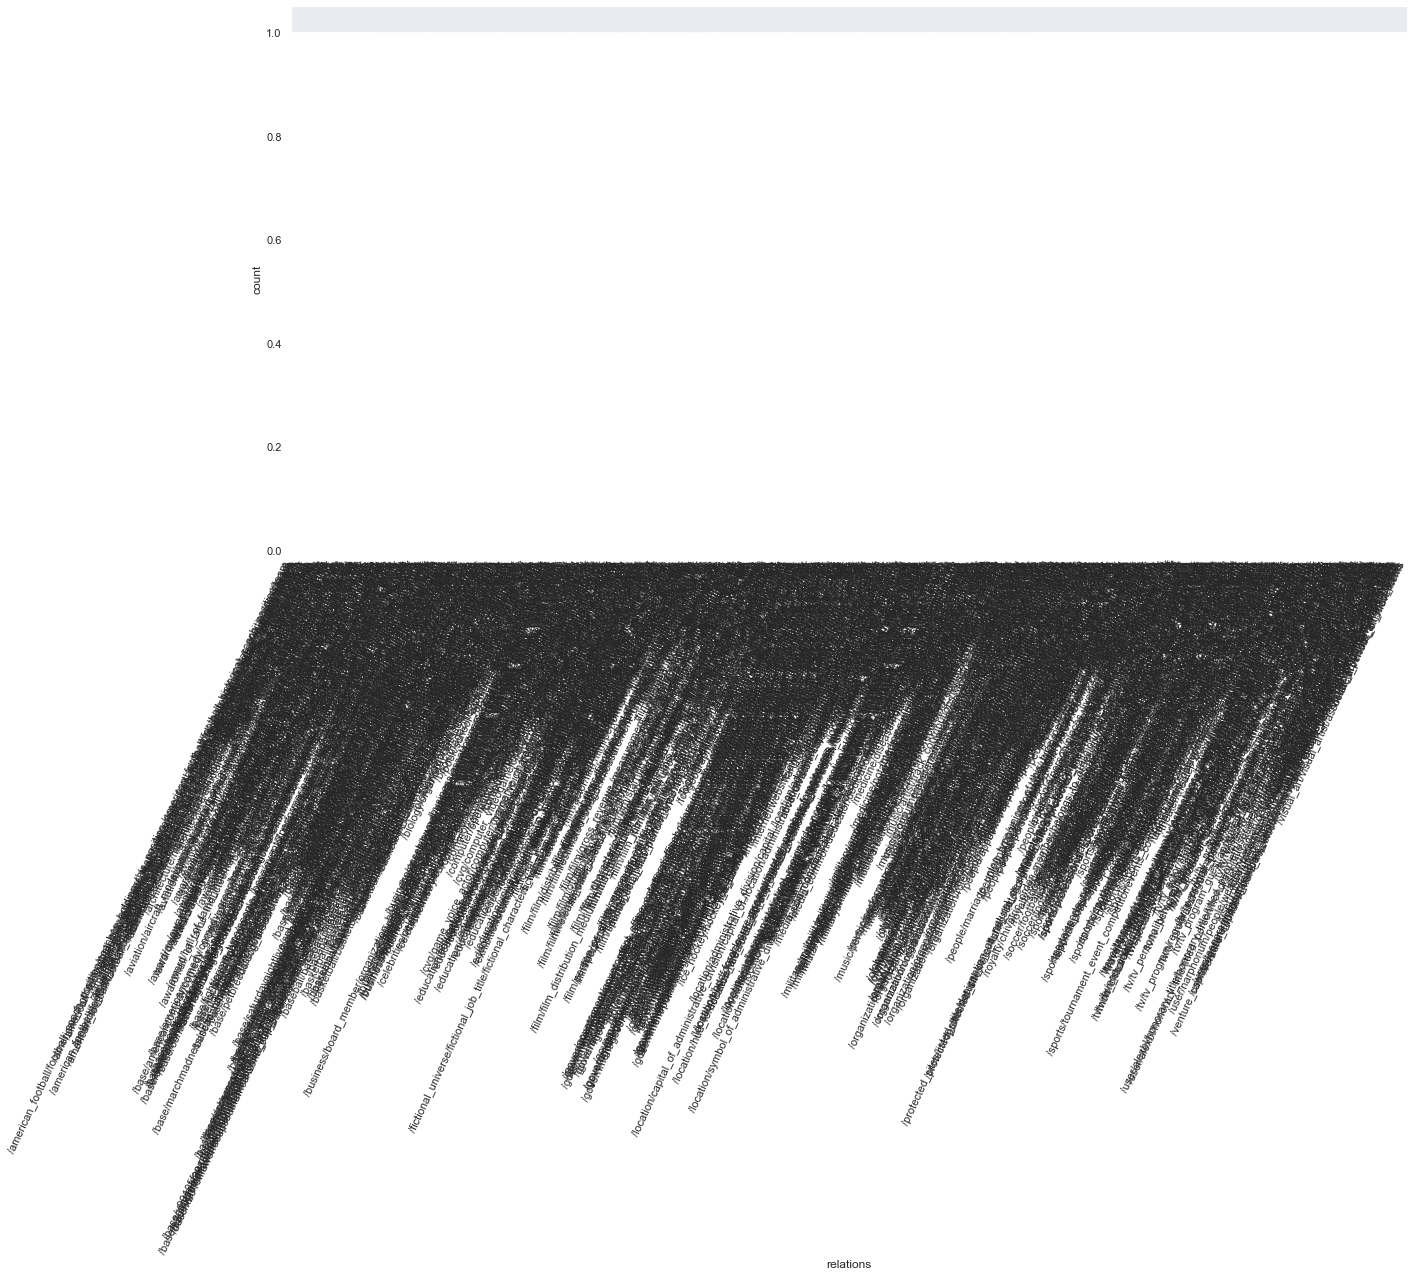

In [233]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', data=FB15k_test_group)
plt.xticks(rotation=65, horizontalalignment='right')

In [ ]:
# Tương tự như tập train
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', data=FB15k_train_group)
plt.xticks(rotation=65, horizontalalignment='right')

## Nhận xét :

Tập dữ liệu FB15k có rất nhiều loại quan hệ (relation_type) : 961 (test), 1345(train), 916(valid)
